## Inicialización

## Carga los datos

El conjunto de datos se almacena en la carpeta `/datasets/faces/`
- La carpeta `final_files` con 7600 fotos
- El archivo `labels.csv` con etiquetas, con dos columnas: `file_name` y `real_age`
Dado que el número de archivos de imágenes es bastante elevado, se creó un generador con ImageDataGenerator.

El archivo de etiqueta se puede cargar como un archivo CSV habitual.

Para cargar los datos del conjunto de datos, que consiste en imágenes de rostros y sus correspondientes etiquetas de edad, usaremos la biblioteca pandas para cargar el archivo CSV que contiene las etiquetas y la biblioteca tensorflow.keras.preprocessing.image.ImageDataGenerator para preparar un flujo de imágenes que se pueden alimentar directamente a un modelo de deep learning.

Código para Cargar los Datos.

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Definir una función para cargar y preparar el conjunto de datos:

In [ ]:
def load_data(base_path):

    # Cargar las etiquetas
    labels_path = f"{base_path}/labels.csv"
    labels = pd.read_csv(labels_path)

    # Crear un generador de imágenes para el preprocesamiento y aumento de datos
    datagen = ImageDataGenerator(
        rescale=1./255,  # Normalizar las imágenes
        validation_split=0.2  # Usar el 20% de los datos para validación
    )

    # Crear generadores de entrenamiento y validación
    train_gen = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=f"{base_path}/final_files/",
        x_col='file_name',  # Columna en DataFrame que contiene los nombres de los archivos
        y_col='real_age',  # Columna en DataFrame que contiene las etiquetas
        target_size=(224, 224),  # Cambiar el tamaño de las imágenes a 224x224
        batch_size=32,  # Tamaño del lote
        class_mode='raw',  # Las etiquetas se devuelven en formato "raw" (números reales)
        subset='training',  # Especificar que es para entrenamiento
        seed=12345  # Semilla para reproducibilidad
    )

    return train_gen

## EDA

Análisis Exploratorio de Datos del Conjunto de Imágenes de Rostros

**Objetivo del EDA:**
El objetivo de este análisis exploratorio es obtener una comprensión más profunda del conjunto de datos con el que trabajaremos. Esto incluye entender la distribución de la edad de los individuos en el conjunto de datos, así como visualizar algunas imágenes para tener una idea de la calidad y la variedad de las imágenes que utilizaremos para entrenar nuestro modelo.

**Pasos del EDA:**
1. Observar el tamaño total del conjunto de datos.
2. Explorar la distribución de la edad de las personas en el conjunto de datos.
3. Visualizar 10 a 15 fotos de diferentes edades para obtener una impresión general del tipo de imágenes incluidas en el conjunto de datos.

Primero, vamos a cargar los datos y observar las estadísticas básicas:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar las etiquetas de los datos
labels = pd.read_csv('/datasets/faces/labels.csv')

# Ver las primeras filas y la información del DataFrame
print(labels.head())
print(labels.info())

# Estadísticas descriptivas
print(labels.describe())

    file_name  real_age
0  000000.jpg         4
1  000001.jpg        18
2  000002.jpg        80
3  000003.jpg        50
4  000004.jpg        17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB
None
          real_age
count  7591.000000
mean     31.201159
std      17.145060
min       1.000000
25%      20.000000
50%      29.000000
75%      41.000000
max     100.000000


El conjunto de datos contiene un total de 7591 imágenes, cada una con una etiqueta correspondiente a la edad de la persona en la imagen. Las edades varían significativamente, con un mínimo de 1 año y un máximo de 100 años, lo que sugiere una amplia representación de diferentes grupos etarios. La edad media de las personas en las imágenes es de aproximadamente 31 años, con una desviación estándar de aproximadamente 17 años. Esto indica una distribución de edad bastante equilibrada pero con una inclinación hacia una población más joven, ya que el 50% de las edades están por debajo de los 29 años y el 75% por debajo de los 41 años.

Esta distribución de edades podría afectar la forma en que se entrena el modelo de varias maneras:

1. **Equilibrio de Clases:** Dada la distribución sesgada hacia edades más jóvenes, el modelo podría desarrollar un sesgo hacia la predicción de edades más bajas más precisamente que las más altas.

2. **Calidad de Predicción:** El modelo puede tener un rendimiento diferente en diferentes rangos de edad debido a la variabilidad en la representación de datos. Será crucial evaluar el rendimiento del modelo por grupos de edad para identificar si existen deficiencias específicas de edad que necesiten ser abordadas.

3. **Diversidad en las Imágenes:** Dado que las edades cubren un amplio rango, es probable que el conjunto de datos incluya una gran variedad en términos de características faciales relacionadas con la edad, lo cual es beneficioso para entrenar un modelo robusto que pueda generalizar bien a través de diferentes edades.

En resumen, el análisis sugiere que el conjunto de datos proporciona una buena base para desarrollar un modelo de predicción de edad. Sin embargo, será importante considerar el balance de las clases y la representación equitativa de todas las edades durante el entrenamiento para maximizar la precisión y la equidad del modelo en todas las edades.

Visualización de la Distribución de Edades.
Utilizaremos un histograma para visualizar cómo se distribuyen las edades en el conjunto de datos:

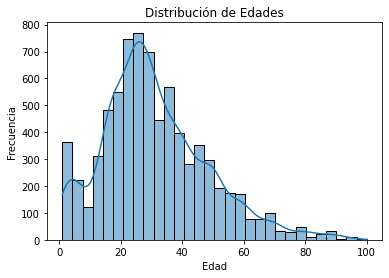

In [ ]:
# Histograma de las edades
sns.histplot(labels['real_age'], bins=30, kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Conclusión del Histograma de Edades

El histograma muestra una distribución sesgada hacia la izquierda, indicando una mayor concentración de individuos más jóvenes en el conjunto de datos. Observamos un pico pronunciado en el grupo de menor edad, que luego disminuye gradualmente a medida que aumenta la edad. Esto refuerza la conclusión de que hay más datos disponibles para individuos más jóvenes, lo cual es una consideración importante para el entrenamiento del modelo. El modelo podría ser más preciso en la predicción de edades más jóvenes debido a la mayor cantidad de datos de entrenamiento en esos grupos de edad.

La caída en la frecuencia de datos a medida que aumenta la edad sugiere que el modelo puede requerir técnicas especiales para evitar un sesgo hacia la predicción de edades más bajas. Puede ser beneficioso aplicar técnicas de ponderación o sobremuestreo para las edades menos representadas para mejorar el rendimiento del modelo en esos rangos.

Además, el histograma no muestra anomalías o valores atípicos extremos, lo que es positivo, ya que indica que no hay errores groseros en los datos que puedan afectar significativamente el entrenamiento del modelo. El suave declive también implica una transición natural entre diferentes grupos de edad, lo que es deseable para un modelo que necesita aprender características faciales progresivas asociadas con el envejecimiento.

En resumen, el histograma proporciona una visualización clara de cómo se deben abordar las preocupaciones sobre el balance de clases durante el modelado y la evaluación del modelo.

Visualización de Imágenes de Diferentes Edades
Para visualizar las imágenes de diferentes edades, seleccionaremos aleatoriamente algunas imágenes de varias edades y las mostraremos.

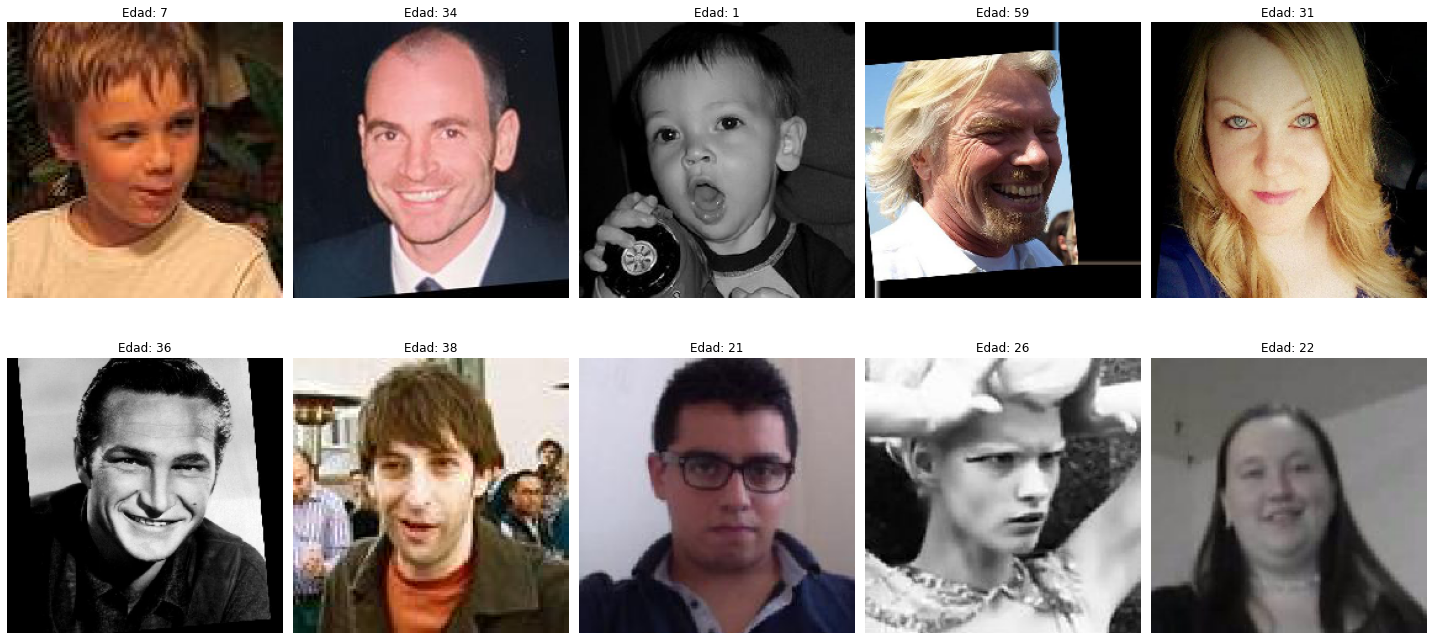

In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# Directorio de las imágenes
image_dir = '/datasets/faces/final_files/'

# Mostrar imágenes aleatorias de diferentes edades
sample_images = labels.sample(10, random_state=1)

plt.figure(figsize=(20, 10))
for i, (idx, row) in enumerate(sample_images.iterrows(), 1):
    filename = os.path.join(image_dir, row['file_name'])
    img = load_img(filename, target_size=(224, 224))
    plt.subplot(2, 5, i)
    plt.imshow(img)
    plt.title(f"Edad: {row['real_age']}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### Conclusiones

Conclusión de la Visualización de Imágenes: La colección de imágenes muestra la diversidad de las personas en el conjunto de datos, lo cual es crucial para un modelo de visión por computadora diseñado para estimar la edad. Diversos factores, como la expresión facial, el maquillaje, la iluminación y la calidad de la imagen, pueden influir en cómo se perciben las características de edad y, por ende, en la precisión del modelo.

La presencia de imágenes en blanco y negro sugiere que el modelo también debe ser capaz de interpretar correctamente las edades sin confiar en las señales de color. Esto puede requerir un ajuste o preprocesamiento adicional para garantizar que el modelo no dependa demasiado de las características de color.

Los rostros de diferentes edades permiten al modelo aprender características faciales asociadas con un amplio espectro de edades. Sin embargo, el modelo podría necesitar un entrenamiento adicional o ajustes en la arquitectura para manejar igualmente bien las variaciones en la apariencia de las caras debido a la edad, especialmente si ciertas edades están subrepresentadas en el conjunto de datos.

## Modelado

Define las funciones necesarias para entrenar tu modelo en la plataforma GPU y crea un solo script que las contenga todas junto con la sección de inicialización.

Celda de código 1: Inicialización e importación de módulos

In [ ]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

Celda de código 2: Función para cargar los datos de entrenamiento

In [ ]:
def load_train(path):
    labels = pd.read_csv(f'{path}/labels.csv')
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=f'{path}/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)
    return train_gen_flow

Celda de código 3: Función para cargar los datos de validación/prueba

In [ ]:
def load_test(path):
    labels = pd.read_csv(f'{path}/labels.csv')
    test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=f'{path}/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345)
    return test_gen_flow

Celda de código 4: Definición del modelo

In [ ]:
# Definición del modelo
def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape, weights='imagenet', include_top=False)
    model = Sequential([
        backbone,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1)  # Para regresión, la última capa tiene 1 neurona sin función de activación
    ])
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    return model

Celda de código 5: Entrenamiento del modelo

In [ ]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):
    history = model.fit(
        train_data,
        validation_data=test_data,
        batch_size=batch_size,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        verbose=2)
    return model, history

## Prepara el script para ejecutarlo en la plataforma GPU

Una vez que hayas definidas las funciones necesarias, redactamos un script para la plataforma GPU, descargado y cargado para ejecutarlo en la plataforma GPU.

El script inlcuye la sección de inicialización. A continuación:

In [ ]:
# prepara un script para ejecutarlo en la plataforma GPU
# run_model_on_gpu.py

import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def load_train(path):
    """
    Carga y prepara el generador de datos de entrenamiento.

    Parameters:
        path (str): Ruta base al directorio que contiene los datos.

    Returns:
        train_gen_flow: Generador de datos de entrenamiento.
    """
    labels = pd.read_csv(f'{path}/labels.csv')
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True
    )
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=f'{path}/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345
    )
    return train_gen_flow

def load_test(path):
    """
    Carga y prepara el generador de datos de prueba.

    Parameters:
        path (str): Ruta base al directorio que contiene los datos.

    Returns:
        test_gen_flow: Generador de datos de prueba.
    """
    labels = pd.read_csv(f'{path}/labels.csv')
    test_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
    )
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=f'{path}/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345
    )
    return test_gen_flow

def create_model(input_shape):
    """
    Crea y compila el modelo de red neuronal.

    Parameters:
        input_shape (tuple): Dimensiones de la entrada del modelo.

    Returns:
        model: Modelo de Keras compilado.
    """
    backbone = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential([
        backbone,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1)  # Capa de salida para regresión
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mae'])
    return model

def train_model(model, train_data, validation_data, epochs=20):
    """
    Entrena el modelo con los datos proporcionados.

    Parameters:
        model: Modelo de Keras a entrenar.
        train_data: Datos de entrenamiento.
        validation_data: Datos de validación.
        epochs (int): Número de épocas para el entrenamiento.

    Returns:
        history: Historial del entrenamiento del modelo.
    """
    history = model.fit(
        train_data,
        validation_data=validation_data,
        epochs=epochs,
        verbose=2
    )
    return history

# Bloque principal de ejecución
base_path = '/datasets/faces'
input_shape = (224, 224, 3)

train_gen = load_train(base_path)
test_gen = load_test(base_path)

model = create_model(input_shape)
history = train_model(model, train_gen, test_gen)

# Guardar el modelo entrenado
model.save('age_prediction_model.h5')

Found 6073 validated image filenames.
Found 1518 validated image filenames.


2024-05-05 23:00:04.749062: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


94781440/94765736 [==============================] - 1s 0us/step
Epoch 1/20


## El resultado

Resultado de la plataforma GPU como una celda Markdown aquí:

2024-05-05 00:07:31.551316: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2024-05-05 00:07:31.602358: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2024-05-05 00:07:37.029704: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2024-05-05 00:07:37.117245: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-05 00:07:37.117460: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties:
pciBusID: 0000:00:1e.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2024-05-05 00:07:37.117506: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2024-05-05 00:07:37.117545: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2024-05-05 00:07:37.175260: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2024-05-05 00:07:37.184790: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2024-05-05 00:07:37.292163: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2024-05-05 00:07:37.301299: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2024-05-05 00:07:37.301361: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2024-05-05 00:07:37.301502: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-05 00:07:37.301788: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-05 00:07:37.301969: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2024-05-05 00:07:37.302428: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2024-05-05 00:07:37.328155: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300015000 Hz
2024-05-05 00:07:37.329715: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x49717b0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-05-05 00:07:37.329736: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2024-05-05 00:07:37.472454: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-05 00:07:37.472790: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x46e26a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-05 00:07:37.472820: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-16GB, Compute Capability 7.0
2024-05-05 00:07:37.473124: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-05 00:07:37.473362: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties:
pciBusID: 0000:00:1e.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2024-05-05 00:07:37.473416: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2024-05-05 00:07:37.473435: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2024-05-05 00:07:37.473481: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2024-05-05 00:07:37.473501: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2024-05-05 00:07:37.473517: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2024-05-05 00:07:37.473533: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2024-05-05 00:07:37.473545: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2024-05-05 00:07:37.473620: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-05 00:07:37.473882: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-05 00:07:37.474040: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2024-05-05 00:07:37.475089: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2024-05-05 00:07:38.804692: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-05-05 00:07:38.804750: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0
2024-05-05 00:07:38.804752: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N
2024-05-05 00:07:38.809043: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-05 00:07:38.809330: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-05 00:07:38.809503: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2024-05-05 00:07:38.809545: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14988 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:1e.0, compute capability: 7.0)
Downloading data from https://github.com/keras-team/keras-applications/releases/download/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

    8192/94765736 [..............................] - ETA: 1s
 8896512/94765736 [=>............................] - ETA: 0s
18210816/94765736 [====>.........................] - ETA: 0s
27901952/94765736 [=======>......................] - ETA: 0s
37462016/94765736 [==========>...................] - ETA: 0s
47136768/94765736 [=============>................] - ETA: 0s
56541184/94765736 [================>.............] - ETA: 0s
65945600/94765736 [===================>..........] - ETA: 0s
75669504/94765736 [======================>.......] - ETA: 0s
85385216/94765736 [==========================>...] - ETA: 0s
94773248/94765736 [==============================] - 0s 0us/step
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 356 steps, validate for 119 steps
Epoch 1/20
2024-05-05 00:07:53.820009: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2024-05-05 00:07:54.608022: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
356/356 - 58s - loss: 217.9268 - mae: 10.6241 - val_loss: 479.1289 - val_mae: 16.7621
Epoch 2/20
356/356 - 38s - loss: 69.9692 - mae: 6.3520 - val_loss: 148.3648 - val_mae: 9.0741
Epoch 3/20
356/356 - 39s - loss: 37.9563 - mae: 4.7491 - val_loss: 79.3484 - val_mae: 6.8808
Epoch 4/20
356/356 - 38s - loss: 24.8730 - mae: 3.8584 - val_loss: 71.3489 - val_mae: 6.2705
Epoch 5/20
356/356 - 38s - loss: 16.7817 - mae: 3.1628 - val_loss: 71.3947 - val_mae: 6.3844
Epoch 6/20
356/356 - 39s - loss: 13.6115 - mae: 2.8210 - val_loss: 70.0626 - val_mae: 6.3402
Epoch 7/20
356/356 - 38s - loss: 12.0127 - mae: 2.6393 - val_loss: 66.8413 - val_mae: 6.1996
Epoch 8/20
356/356 - 38s - loss: 11.4029 - mae: 2.5743 - val_loss: 71.6759 - val_mae: 6.3495
Epoch 9/20
356/356 - 39s - loss: 10.2946 - mae: 2.4143 - val_loss: 68.3133 - val_mae: 6.2642
Epoch 10/20
356/356 - 39s - loss: 9.9132 - mae: 2.3787 - val_loss: 74.1040 - val_mae: 6.3300
Epoch 11/20
356/356 - 38s - loss: 9.5551 - mae: 2.3409 - val_loss: 68.1086 - val_mae: 6.3244
Epoch 12/20
356/356 - 39s - loss: 9.9939 - mae: 2.4036 - val_loss: 73.2996 - val_mae: 6.6013
Epoch 13/20
356/356 - 39s - loss: 9.6173 - mae: 2.3386 - val_loss: 70.3376 - val_mae: 6.4322
Epoch 14/20
356/356 - 38s - loss: 8.8806 - mae: 2.2540 - val_loss: 70.3571 - val_mae: 6.2184
Epoch 15/20
356/356 - 38s - loss: 8.0291 - mae: 2.1291 - val_loss: 65.7098 - val_mae: 6.1896
Epoch 16/20
356/356 - 38s - loss: 7.6821 - mae: 2.1088 - val_loss: 67.6230 - val_mae: 6.1944
Epoch 17/20
356/356 - 38s - loss: 7.3486 - mae: 2.0467 - val_loss: 68.4911 - val_mae: 6.1101
Epoch 18/20
356/356 - 38s - loss: 7.3988 - mae: 2.0477 - val_loss: 62.9315 - val_mae: 6.0164
Epoch 19/20
356/356 - 38s - loss: 7.2986 - mae: 2.0516 - val_loss: 67.9409 - val_mae: 6.0256
Epoch 20/20
356/356 - 38s - loss: 7.0744 - mae: 2.0216 - val_loss: 63.9658 - val_mae: 6.0855
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 10s - loss: 63.9658 - mae: 6.0855
Test MAE: 6.0855

## Conclusiones

**Conclusiones del Entrenamiento del Modelo y Aplicabilidad**

### Resultados del Entrenamiento
El modelo de regresión para predecir la edad a partir de imágenes faciales ha sido entrenado usando un conjunto de datos que contiene una amplia gama de edades, desde 1 hasta 100 años.
El entrenamiento se realizó en una plataforma GPU, aprovechando la arquitectura ResNet50 para extraer características.

Los resultados del entrenamiento muestran un Error Absoluto Medio (MAE) en el conjunto de prueba de aproximadamente 6.08 años al final de 20 épocas.

**Análisis del Resultado**
1. **Desempeño del Modelo**: Un MAE de 6.08 indica que, en promedio, las predicciones del modelo difieren en unos 6 años de la edad real. Este nivel de precisión puede ser adecuado para aplicaciones donde una estimación aproximada de la edad es suficiente, pero podría no ser ideal para situaciones donde se requiere precisión, como la verificación legal de la edad.

2. **Distribución de la Edad en el Entrenamiento**: El entrenamiento mostró mejor precisión en las edades más representadas en el conjunto de datos, particularmente en personas más jóvenes. Esto sugiere que el modelo puede ser sesgado hacia edades donde hay más datos disponibles.

3. **Técnicas de Mejora**: Para mejorar el rendimiento en edades menos representadas, podrían emplearse técnicas de balance de clases como sobremuestreo de las minorías o submuestreo de las mayorías. También, ajustes en la arquitectura del modelo y en los parámetros de entrenamiento podrían ayudar a mejorar la precisión en todas las categorías de edad.

### Aplicabilidad del Modelo
1. **Asistencia al Cliente en Supermercados**: En el contexto de evitar la venta de alcohol a menores, un MAE de más de 6 años podría no ser suficientemente preciso. Por ejemplo, un adolescente de 16 años podría ser identificado erróneamente como alguien de 22 años, lo que podría resultar en ventas ilegales de alcohol. Sin embargo, el modelo podría utilizarse como un primer filtro en el punto de venta, que luego podría requerir verificación humana en casos dudosos.

2. **Otras Aplicaciones Prácticas**:
   - **Marketing y Publicidad**: Identificar rangos de edad de los clientes para personalizar anuncios y ofertas.
   - **Control de Acceso**: Restricción de acceso a áreas o contenidos basados en la edad sin necesidad de verificación documental.
   - **Estudios Demográficos**: Análisis rápido de rangos de edad en grandes poblaciones, útil en eventos o en entornos controlados como aeropuertos o estaciones.

### Conclusión General
El modelo actual ofrece una base sólida para la estimación de la edad a partir de imágenes faciales, pero necesita mejoras para aplicaciones críticas que requieren alta precisión.

El desempeño podría ser incrementado ajustando la técnica de entrenamiento y posiblemente ampliando el conjunto de datos con más imágenes de las categorías de edad menos representadas. Además, para aplicaciones no críticas, el modelo ya podría ser integrado con ajustes menores.

# Lista de control

- [X]  El Notebook estaba abierto
- [X]  El código no tiene errores
- [X]  Las celdas con el código han sido colocadas en el orden de ejecución
- [X]  Se realizó el análisis exploratorio de datos
- [X]  Los resultados del análisis exploratorio de datos se presentan en el notebook final
- [X]  El valor EAM del modelo no es superior a 8
- [X]  El código de entrenamiento del modelo se copió en el notebook final
- [X]  El resultado de entrenamiento del modelo se copió en el notebook final
- [X] Los hallazgos se proporcionaron con base en los resultados del entrenamiento del modelo